In [1]:
#import packages which are used to machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.metrics import r2_score

In [2]:
#import packages which are used to get data
import sqlalchemy as sqla
from sqlalchemy import create_engine
import traceback
import glob
import os
from pprint import pprint
import simplejson as json
import requests
import time
from IPython.display import display
import psycopg2 as ps
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# database
URI="dublinbike.cckaxoirozab.eu-west-1.rds.amazonaws.com"
PORT=3306
DB="dublinbike"
USER="comp30830"
PASSWORD="dublinbike"

In [4]:
# create engine
engine=create_engine("mysql+mysqldb://{}:{}@{}:{}/{}".format(USER,PASSWORD,URI,PORT,DB),echo=True)

In [5]:
data = pd.read_sql('select * from station', engine)
print(data)

2023-05-01 15:32:20,024 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-05-01 15:32:20,024 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-01 15:32:20,043 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-05-01 15:32:20,044 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-01 15:32:20,051 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-05-01 15:32:20,051 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-01 15:32:20,071 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s
2023-05-01 15:32:20,072 INFO sqlalchemy.engine.Engine [generated in 0.00074s] ('dublinbike', 'select * from station')
2023-05-01 15:32:20,099 INFO sqlalchemy.engine.Engine select * from station
2023-05-01 15:32:20,099 INFO sqlalchemy.engine.Engine [raw sql] ()
                   address  banking  bonus contract_name  \
0            Clarendon Row        0      0        dublin   
1       Blessington Street        0      0 

In [6]:
#convert into dataframe
df_station = pd.DataFrame(data)

In [7]:
#
df_station.to_csv('station.csv')

In [8]:
#show df
df_station

,address,banking,bonus,contract_name,name,number,position_lat,position_lng,status
0,Clarendon Row,0,0,dublin,CLARENDON ROW,1,53.340927,-6.262501,OPEN
1,Blessington Street,0,0,dublin,BLESSINGTON STREET,2,53.356769,-6.268140,OPEN
2,Bolton Street,0,0,dublin,BOLTON STREET,3,53.351182,-6.269859,OPEN
3,Greek Street,0,0,dublin,GREEK STREET,4,53.346874,-6.272976,OPEN
4,Charlemont Street,0,0,dublin,CHARLEMONT PLACE,5,53.330662,-6.260177,OPEN
...,...,...,...,...,...,...,...,...,...
109,Merrion Square South,0,0,dublin,MERRION SQUARE SOUTH,113,53.338614,-6.248606,OPEN
110,Wilton Terrace (Park),0,0,dublin,WILTON TERRACE (PARK),114,53.333653,-6.248345,OPEN
111,Killarney Street,0,0,dublin,KILLARNEY STREET,115,53.354845,-6.247579,OPEN
112,Broadstone,0,0,dublin,BROADSTONE,116,53.354700,-6.272314,OPEN


In [9]:
availability = pd.read_sql('select * from availability', engine)
print(availability)

2023-05-01 15:32:20,184 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s
2023-05-01 15:32:20,184 INFO sqlalchemy.engine.Engine [cached since 0.1129s ago] ('dublinbike', 'select * from availability')
2023-05-01 15:32:20,199 INFO sqlalchemy.engine.Engine select * from availability
2023-05-01 15:32:20,200 INFO sqlalchemy.engine.Engine [raw sql] ()
        number  available_bikes  available_bikes_stands  \
0            1               17                      14   
1            1                0                      31   
2            1                0                      31   
3            1                0                      31   
4            1                0                      31   
...        ...              ...                     ...   
769381     117               38                       0   
769382     117               38                       0   
769383     117               38                   

In [10]:
#convert in to dataframe
df_availability= pd.DataFrame(availability)

In [11]:
# save it as csv file
df_availability.to_csv('availability.csv')

In [12]:
weather = pd.read_sql('select * from weather', engine)
print(weather)

2023-05-01 15:32:28,114 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s
2023-05-01 15:32:28,115 INFO sqlalchemy.engine.Engine [cached since 8.051s ago] ('dublinbike', 'select * from weather')
2023-05-01 15:32:28,129 INFO sqlalchemy.engine.Engine select * from weather
2023-05-01 15:32:28,129 INFO sqlalchemy.engine.Engine [raw sql] ()
    weather    temp  feel_temp  min_temp  max_temp  pressure  humidity  \
0      Rain  281.19     277.21    280.51    281.69       987        76   
1      Rain  281.19     277.21    280.51    281.69       987        76   
2    Clouds  280.31     275.78    279.68    280.58       987        83   
3      Rain  280.77     277.13    279.51    281.48       986        86   
4    Clouds  280.56     276.86    280.00    281.47       986        84   
..      ...     ...        ...       ...       ...       ...       ...   
787    Mist  283.10     282.24    282.36    284.24      1029        95   


In [13]:
#convert in to dataframe
df_weather = pd.DataFrame(weather)

In [14]:
# save it as csv file
df_weather.to_csv('weather.csv')

In [15]:
df_weather

,weather,temp,feel_temp,min_temp,max_temp,pressure,humidity,visibility,wind_speed,wind_deg,time
0,Rain,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:22:41.387915
1,Rain,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:26:44.796587
2,Clouds,280.31,275.78,279.68,280.58,987,83,10000,9.26,220,2023-03-23 02:26:44.940925
3,Rain,280.77,277.13,279.51,281.48,986,86,10000,6.69,210,2023-03-23 03:26:45.041766
4,Clouds,280.56,276.86,280.00,281.47,986,84,10000,6.69,200,2023-03-23 04:26:45.163174
...,...,...,...,...,...,...,...,...,...,...,...
787,Mist,283.10,282.24,282.36,284.24,1029,95,2000,2.06,60,2023-04-18 05:14:20.588446
788,Mist,283.32,282.82,282.77,284.24,1029,93,2000,3.60,70,2023-04-18 06:14:20.675953
789,Mist,283.54,283.01,283.08,283.71,1030,91,4000,3.60,90,2023-04-18 07:14:20.767104
790,Clouds,283.82,283.27,283.47,284.20,1030,89,7000,4.63,90,2023-04-18 08:14:20.889575


## clean data

### stations

In [16]:
df_station

,address,banking,bonus,contract_name,name,number,position_lat,position_lng,status
0,Clarendon Row,0,0,dublin,CLARENDON ROW,1,53.340927,-6.262501,OPEN
1,Blessington Street,0,0,dublin,BLESSINGTON STREET,2,53.356769,-6.268140,OPEN
2,Bolton Street,0,0,dublin,BOLTON STREET,3,53.351182,-6.269859,OPEN
3,Greek Street,0,0,dublin,GREEK STREET,4,53.346874,-6.272976,OPEN
4,Charlemont Street,0,0,dublin,CHARLEMONT PLACE,5,53.330662,-6.260177,OPEN
...,...,...,...,...,...,...,...,...,...
109,Merrion Square South,0,0,dublin,MERRION SQUARE SOUTH,113,53.338614,-6.248606,OPEN
110,Wilton Terrace (Park),0,0,dublin,WILTON TERRACE (PARK),114,53.333653,-6.248345,OPEN
111,Killarney Street,0,0,dublin,KILLARNEY STREET,115,53.354845,-6.247579,OPEN
112,Broadstone,0,0,dublin,BROADSTONE,116,53.354700,-6.272314,OPEN


In [17]:
df_station.dtypes

address           object
banking            int64
bonus              int64
contract_name     object
name              object
number             int64
position_lat     float64
position_lng     float64
status            object
dtype: object

In [18]:
df_station.isnull().sum()

address          0
banking          0
bonus            0
contract_name    0
name             0
number           0
position_lat     0
position_lng     0
status           0
dtype: int64

In [19]:
print('Number of duplicate (excluding first) rows in the table is: ', df_station.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  0


In [20]:
df_availability =pd.read_csv("availability.csv",index_col=0)

In [21]:
df_availability.dtypes

number                     int64
available_bikes            int64
available_bikes_stands     int64
last_update               object
dtype: object

In [22]:
df_availability.isnull().sum()

number                    0
available_bikes           0
available_bikes_stands    0
last_update               0
dtype: int64

In [23]:
print('Number of duplicate (excluding first) rows in the table is: ', df_availability.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  0


In [24]:
df_availability.head(10)

,number,available_bikes,available_bikes_stands,last_update
0,1,17,14,2023
1,1,0,31,2023-03-23 01:13:12.639790
2,1,0,31,2023-03-23 01:18:13.417911
3,1,0,31,2023-03-23 01:26:07.467583
4,1,0,31,2023-03-23 01:31:08.366535
5,1,0,31,2023-03-23 01:36:09.196093
6,1,0,31,2023-03-23 01:41:09.973804
7,1,0,31,2023-03-23 01:46:10.703312
8,1,0,31,2023-03-23 01:51:11.487183
9,1,0,31,2023-03-23 01:56:12.310439


In [25]:
#drop rows which last_update is 2023
df_availability = df_availability[df_availability['last_update']!='2023'].reset_index(drop=True)

In [26]:
# change the format of time
result=[]
for i in range(len(df_availability)):
    result.append(df_availability.last_update[i][0:13]+':00:00')

In [27]:
df_availability["hour"]=result

In [28]:
df_availability.head(10)

,number,available_bikes,available_bikes_stands,last_update,hour
0,1,0,31,2023-03-23 01:13:12.639790,2023-03-23 01:00:00
1,1,0,31,2023-03-23 01:18:13.417911,2023-03-23 01:00:00
2,1,0,31,2023-03-23 01:26:07.467583,2023-03-23 01:00:00
3,1,0,31,2023-03-23 01:31:08.366535,2023-03-23 01:00:00
4,1,0,31,2023-03-23 01:36:09.196093,2023-03-23 01:00:00
5,1,0,31,2023-03-23 01:41:09.973804,2023-03-23 01:00:00
6,1,0,31,2023-03-23 01:46:10.703312,2023-03-23 01:00:00
7,1,0,31,2023-03-23 01:51:11.487183,2023-03-23 01:00:00
8,1,0,31,2023-03-23 01:56:12.310439,2023-03-23 01:00:00
9,1,0,31,2023-03-23 02:01:13.054742,2023-03-23 02:00:00


In [29]:
df_weather=pd.read_csv("weather.csv",index_col=0)

In [30]:
df_weather.isnull().sum()

weather       0
temp          0
feel_temp     0
min_temp      0
max_temp      0
pressure      0
humidity      0
visibility    0
wind_speed    0
wind_deg      0
time          0
dtype: int64

In [31]:
df_weather.dtypes

weather        object
temp          float64
feel_temp     float64
min_temp      float64
max_temp      float64
pressure        int64
humidity        int64
visibility      int64
wind_speed    float64
wind_deg        int64
time           object
dtype: object

In [32]:
print('Number of duplicate (excluding first) rows in the table is: ', df_weather.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  0


In [33]:
# change the format of time
result=[]
for i in range(len(df_weather)):
    result.append(df_weather.time[i][0:13]+':00:00')

In [34]:
df_weather["hour"]=result

In [35]:
df_weather.head(10)

,weather,temp,feel_temp,min_temp,max_temp,pressure,humidity,visibility,wind_speed,wind_deg,time,hour
0,Rain,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:22:41.387915,2023-03-23 01:00:00
1,Rain,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:26:44.796587,2023-03-23 01:00:00
2,Clouds,280.31,275.78,279.68,280.58,987,83,10000,9.26,220,2023-03-23 02:26:44.940925,2023-03-23 02:00:00
3,Rain,280.77,277.13,279.51,281.48,986,86,10000,6.69,210,2023-03-23 03:26:45.041766,2023-03-23 03:00:00
4,Clouds,280.56,276.86,280.00,281.47,986,84,10000,6.69,200,2023-03-23 04:26:45.163174,2023-03-23 04:00:00
5,Clouds,281.09,277.22,280.51,281.69,986,83,10000,7.72,210,2023-03-23 05:26:45.251287,2023-03-23 05:00:00
6,Clouds,281.09,277.08,280.51,281.69,986,81,10000,8.23,210,2023-03-23 06:26:45.402268,2023-03-23 06:00:00
7,Clouds,281.51,277.36,280.51,282.25,986,81,10000,9.26,210,2023-03-23 07:26:45.487907,2023-03-23 07:00:00
8,Clouds,282.73,279.97,282.02,283.15,986,78,10000,5.66,190,2023-03-23 08:26:45.577704,2023-03-23 08:00:00
9,Clouds,284.01,283.08,282.68,284.58,986,74,10000,10.29,210,2023-03-23 09:26:45.672575,2023-03-23 09:00:00


In [36]:
df_availability_new=df_availability.groupby(["number","hour"])["available_bikes"].mean()

In [37]:
df_availability_new=pd.DataFrame(df_availability_new)

In [38]:
df_availability_new = df_availability_new.reset_index()

In [39]:
df_availability_new.head(10)

,number,hour,available_bikes
0,1,2023-03-23 01:00:00,0.000000
1,1,2023-03-23 02:00:00,0.000000
2,1,2023-03-23 03:00:00,0.000000
3,1,2023-03-23 04:00:00,0.000000
4,1,2023-03-23 05:00:00,0.000000
5,1,2023-03-23 06:00:00,1.000000
6,1,2023-03-23 07:00:00,7.166667
7,1,2023-03-23 08:00:00,13.416667
8,1,2023-03-23 09:00:00,21.416667
9,1,2023-03-23 10:00:00,21.500000


In [40]:
df_availability_new=df_availability_new.merge(df_weather,on='hour')

In [41]:
pd.set_option('display.max_rows', None)
df_availability[['available_bikes','last_update']].set_index(pd.DatetimeIndex(df_availability.last_update)).resample(rule='1H').mean()

/var/folders/wr/7y3zysbj7v98hljgp945drfc0000gn/T/ipykernel_3623/3927803030.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_availability[['available_bikes','last_update']].set_index(pd.DatetimeIndex(df_availability.last_update)).resample(rule='1H').mean()


,available_bikes
last_update,
2023-03-23 01:00:00,12.052632
2023-03-23 02:00:00,12.059942
2023-03-23 03:00:00,12.061404
2023-03-23 04:00:00,12.061404
2023-03-23 05:00:00,11.935673
2023-03-23 06:00:00,11.548977
2023-03-23 07:00:00,11.152778
2023-03-23 08:00:00,10.064327
2023-03-23 09:00:00,10.671053


In [42]:
pd.set_option('display.max_rows', None)
df_weather.set_index(pd.DatetimeIndex(df_weather.time)).resample(rule='1H').mean()

/var/folders/wr/7y3zysbj7v98hljgp945drfc0000gn/T/ipykernel_3623/384353120.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weather.set_index(pd.DatetimeIndex(df_weather.time)).resample(rule='1H').mean()


,temp,feel_temp,min_temp,max_temp,pressure,humidity,visibility,wind_speed,wind_deg
time,,,,,,,,,
2023-03-23 01:00:00,281.190,277.210,280.510,281.690,987.0,76.0,10000.0,8.230,200.0
2023-03-23 02:00:00,280.310,275.780,279.680,280.580,987.0,83.0,10000.0,9.260,220.0
2023-03-23 03:00:00,280.770,277.130,279.510,281.480,986.0,86.0,10000.0,6.690,210.0
2023-03-23 04:00:00,280.560,276.860,280.000,281.470,986.0,84.0,10000.0,6.690,200.0
2023-03-23 05:00:00,281.090,277.220,280.510,281.690,986.0,83.0,10000.0,7.720,210.0
2023-03-23 06:00:00,281.090,277.080,280.510,281.690,986.0,81.0,10000.0,8.230,210.0
2023-03-23 07:00:00,281.510,277.360,280.510,282.250,986.0,81.0,10000.0,9.260,210.0
2023-03-23 08:00:00,282.730,279.970,282.020,283.150,986.0,78.0,10000.0,5.660,190.0
2023-03-23 09:00:00,284.010,283.080,282.680,284.580,986.0,74.0,10000.0,10.290,210.0


## change datatypes

In [43]:
df_availability.dtypes

number                     int64
available_bikes            int64
available_bikes_stands     int64
last_update               object
hour                      object
dtype: object

In [44]:
df_weather.dtypes

weather        object
temp          float64
feel_temp     float64
min_temp      float64
max_temp      float64
pressure        int64
humidity        int64
visibility      int64
wind_speed    float64
wind_deg        int64
time           object
hour           object
dtype: object

In [45]:
df_availability_new["hour"] = df_availability_new["hour"].astype("datetime64[ns]")

In [46]:
df_availability_new['year']=pd.DatetimeIndex(df_availability_new['hour']).year
df_availability_new['month']=pd.DatetimeIndex(df_availability_new['hour']).month
df_availability_new['day']=pd.DatetimeIndex(df_availability_new['hour']).day
df_availability_new['hours']=pd.DatetimeIndex(df_availability_new['hour']).hour

In [47]:
df_availability_new.dtypes

number                      int64
hour               datetime64[ns]
available_bikes           float64
weather                    object
temp                      float64
feel_temp                 float64
min_temp                  float64
max_temp                  float64
pressure                    int64
humidity                    int64
visibility                  int64
wind_speed                float64
wind_deg                    int64
time                       object
year                        int64
month                       int64
day                         int64
hours                       int64
dtype: object

In [48]:
df_availability_new.shape

(82536, 18)

## find colums to train machine learning model

In [49]:
df_availability_new["weather"].unique()

array(['Rain', 'Clouds', 'Clear', 'Mist', 'Fog', 'Drizzle'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelBinarizer

In [51]:
# convert weather into contious number
test_array = ['Clear','Clouds','Fog','Mist','Drizzle','Rain']
result=[]
for i in range(len(df_availability_new)):
    for j in range(len(test_array)):
        if df_availability_new["weather"][i]==test_array[j]:
            result.append(j+1)
df_availability_new["weather"]=result

/var/folders/wr/7y3zysbj7v98hljgp945drfc0000gn/T/ipykernel_3623/2027053886.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'available_bikes'),
  Text(1.5, 0, 'month'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'hours'),
  Text(4.5, 0, 'weather')])

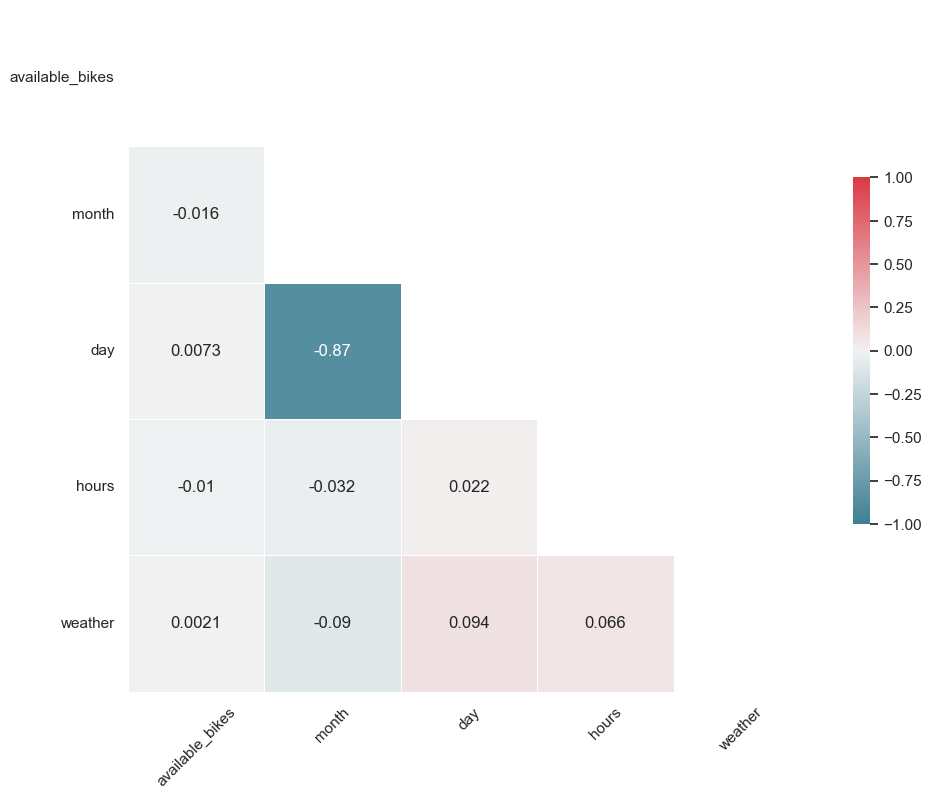

In [52]:
sns.set(style="white")
continuous_columns1 = ['available_bikes','month','day','hours','weather']
# Calculate correlation of all pairs of continuous features
corr = df_availability_new[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [53]:
# choose X_train
cols=["month","day","hours","temp","humidity","wind_speed","weather"]

In [54]:
df_availability_new.head(3000)

,number,hour,available_bikes,weather,temp,feel_temp,min_temp,max_temp,pressure,humidity,visibility,wind_speed,wind_deg,time,year,month,day,hours
0,1,2023-03-23 01:00:00,0.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:22:41.387915,2023,3,23,1
1,1,2023-03-23 01:00:00,0.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:26:44.796587,2023,3,23,1
2,2,2023-03-23 01:00:00,10.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:22:41.387915,2023,3,23,1
3,2,2023-03-23 01:00:00,10.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:26:44.796587,2023,3,23,1
4,3,2023-03-23 01:00:00,11.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:22:41.387915,2023,3,23,1
5,3,2023-03-23 01:00:00,11.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:26:44.796587,2023,3,23,1
6,4,2023-03-23 01:00:00,3.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:22:41.387915,2023,3,23,1
7,4,2023-03-23 01:00:00,3.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:26:44.796587,2023,3,23,1
8,5,2023-03-23 01:00:00,40.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:22:41.387915,2023,3,23,1
9,5,2023-03-23 01:00:00,40.000000,6,281.19,277.21,280.51,281.69,987,76,10000,8.23,200,2023-03-23 01:26:44.796587,2023,3,23,1


In [55]:
X = df_availability_new[cols]
y = df_availability_new['available_bikes']

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
# X_train.head(5)

In [58]:
# a= LinearRegression() # choose your own model here...
# a.fit(X_train, y_train)

In [59]:
# df

In [64]:
# creatge 114 machine learning model
for i in range(1,115):
    if i!=46 and i!=70 and i!=81:
        df=df_availability_new.loc[(df_availability_new['number']==i)]
        X = df_availability_new[cols]
        y = df_availability_new['available_bikes']
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        a= RandomForestRegressor()
        a.fit(X_train, y_train)
        with open('model' + str(i) + '.pkl', 'wb') as handle:
            pickle.dump(a, handle, pickle.HIGHEST_PROTOCOL)
        y_pred = a.predict(X_test)

# Calculate R-squared value for the model
        r2 = r2_score(y_test, y_pred)
        print("R-squared value:", r2)

R-squared value: -0.016025419509478223
R-squared value: -0.015327465735444967
R-squared value: -0.018298463142860877
R-squared value: -0.018170006655287008
R-squared value: -0.016665154727401932
R-squared value: -0.018061311331876162
R-squared value: -0.015978885907666163
R-squared value: -0.01803317214917155
R-squared value: -0.017046721307413693
R-squared value: -0.01720130451156865
R-squared value: -0.019820677666421593
R-squared value: -0.01737665670444022
R-squared value: -0.016793577694966144
R-squared value: -0.017580037066605714
R-squared value: -0.0165771487054589
R-squared value: -0.0191475956397662
R-squared value: -0.01579736015248101
R-squared value: -0.017027994716423134
R-squared value: -0.020317095036671118
R-squared value: -0.01817447146169049
R-squared value: -0.016762993751275657
R-squared value: -0.018886171441819366
R-squared value: -0.018994516409067908
R-squared value: -0.016010182508026105
R-squared value: -0.017421438476867834
R-squared value: -0.01734455754345

In [61]:
# with open('test' + str(1) + '.pkl', 'wb') as handle:
#     pickle.dump(a, handle, pickle.HIGHEST_PROTOCOL)

In [62]:
result=a.predict(X_test)

In [63]:
print(result)

[10.47218357 10.94301167 11.23220092 ... 10.86062908 11.77795754
 11.77846642]
